# Analisi infetti e deceduti

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

import plotly.graph_objects as go

## Lettura dati

In [26]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

giorni_label=np.array([g[0:10] for g in giorni])

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 688
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2022-01-11T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [27]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni e parametri delle figure

In [28]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)




## Grafici Nazionali

In [29]:
indicatori_selected=['totale_casi',
                     'nuovi_positivi',
                     'guariti_giornalieri',
                    'variazione_totale_positivi',
                    'totale_positivi',
                    'deceduti_giornalieri']

days_back=90
days_back=len(giorni)

In [30]:
for indicatore in indicatori_selected:
    fig=go.Figure()
    
    fig.add_trace(go.Scatter(x=giorni[-days_back:],
                            y=trend[indicatore]['Italia'][-days_back:],
                             mode='markers'))
    # versione lisciata
    fig.add_trace(go.Scatter(x=giorni[-days_back:],
                            y=moving_function_rev1(trend[indicatore]['Italia'][-days_back:],np.mean,3,3)))

    fig.update_layout(
        title='%s, Italia. Odierno %d'%(indicatore,trend[indicatore]['Italia'][-1]),
        autosize=False,
        showlegend=False,
        width=900,
        height=600)
    fig.show()

### Grafici per regione

In [31]:
indicatori_selected=['nuovi_positivi',
                    'guariti_giornalieri',
                    'variazione_totale_positivi']

last_days=60

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle('%s ultimi %d giorni'%(indicatore,last_days), y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter[-last_days:],trend[indicatore][regione][-last_days:],
                             'b-',linewidth=0.5,label='Reg')
        ax[grid_seq[i]].plot(day_counter[-last_days:],moving_function_rev1(trend[indicatore][regione][-last_days:],np.mean,3,3),
                             'r--',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend[indicatore][regione][-1])
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
    #fig.savefig('PIC_%s.JPG'%indicatore)

fig.show()


C:\Users\klaat\Anaconda3\envs\p37env\lib\site-packages\ipykernel_launcher.py:23: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



## Deceduti nel tempo

**Per regione giornalieri**

In [32]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('deceduti_giornalieri', y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(day_counter,trend['deceduti_giornalieri'][regione],'b-',label='Raw')
    ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend['deceduti_giornalieri'][regione][-1])
    # plotto anche media
    ax[grid_seq[i]].plot(day_counter,
                         moving_function_rev1(trend['deceduti_giornalieri'][regione],np.mean,3,3),
                         'g--',
                         label='Trend')
    ax[grid_seq[i]].legend()

### Indicatori per popolazione e per regione negli ultimi giorni

Si specifica la lista degli indicatori e i giorni indietro cui guardare per la produzione di grafici a barre

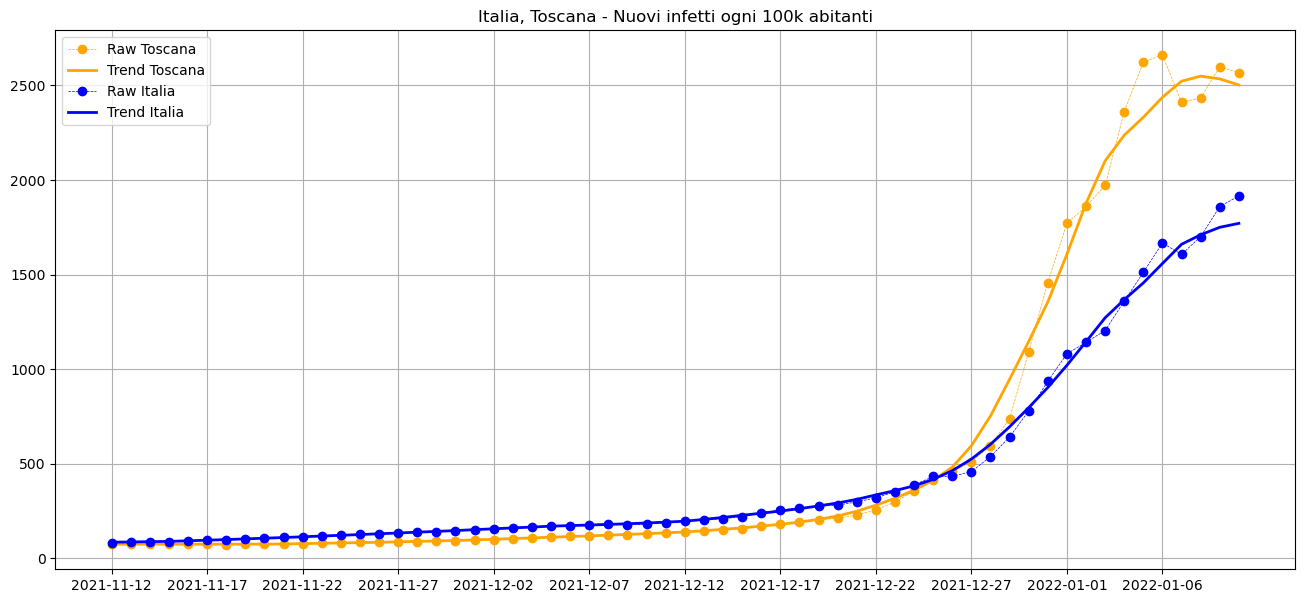

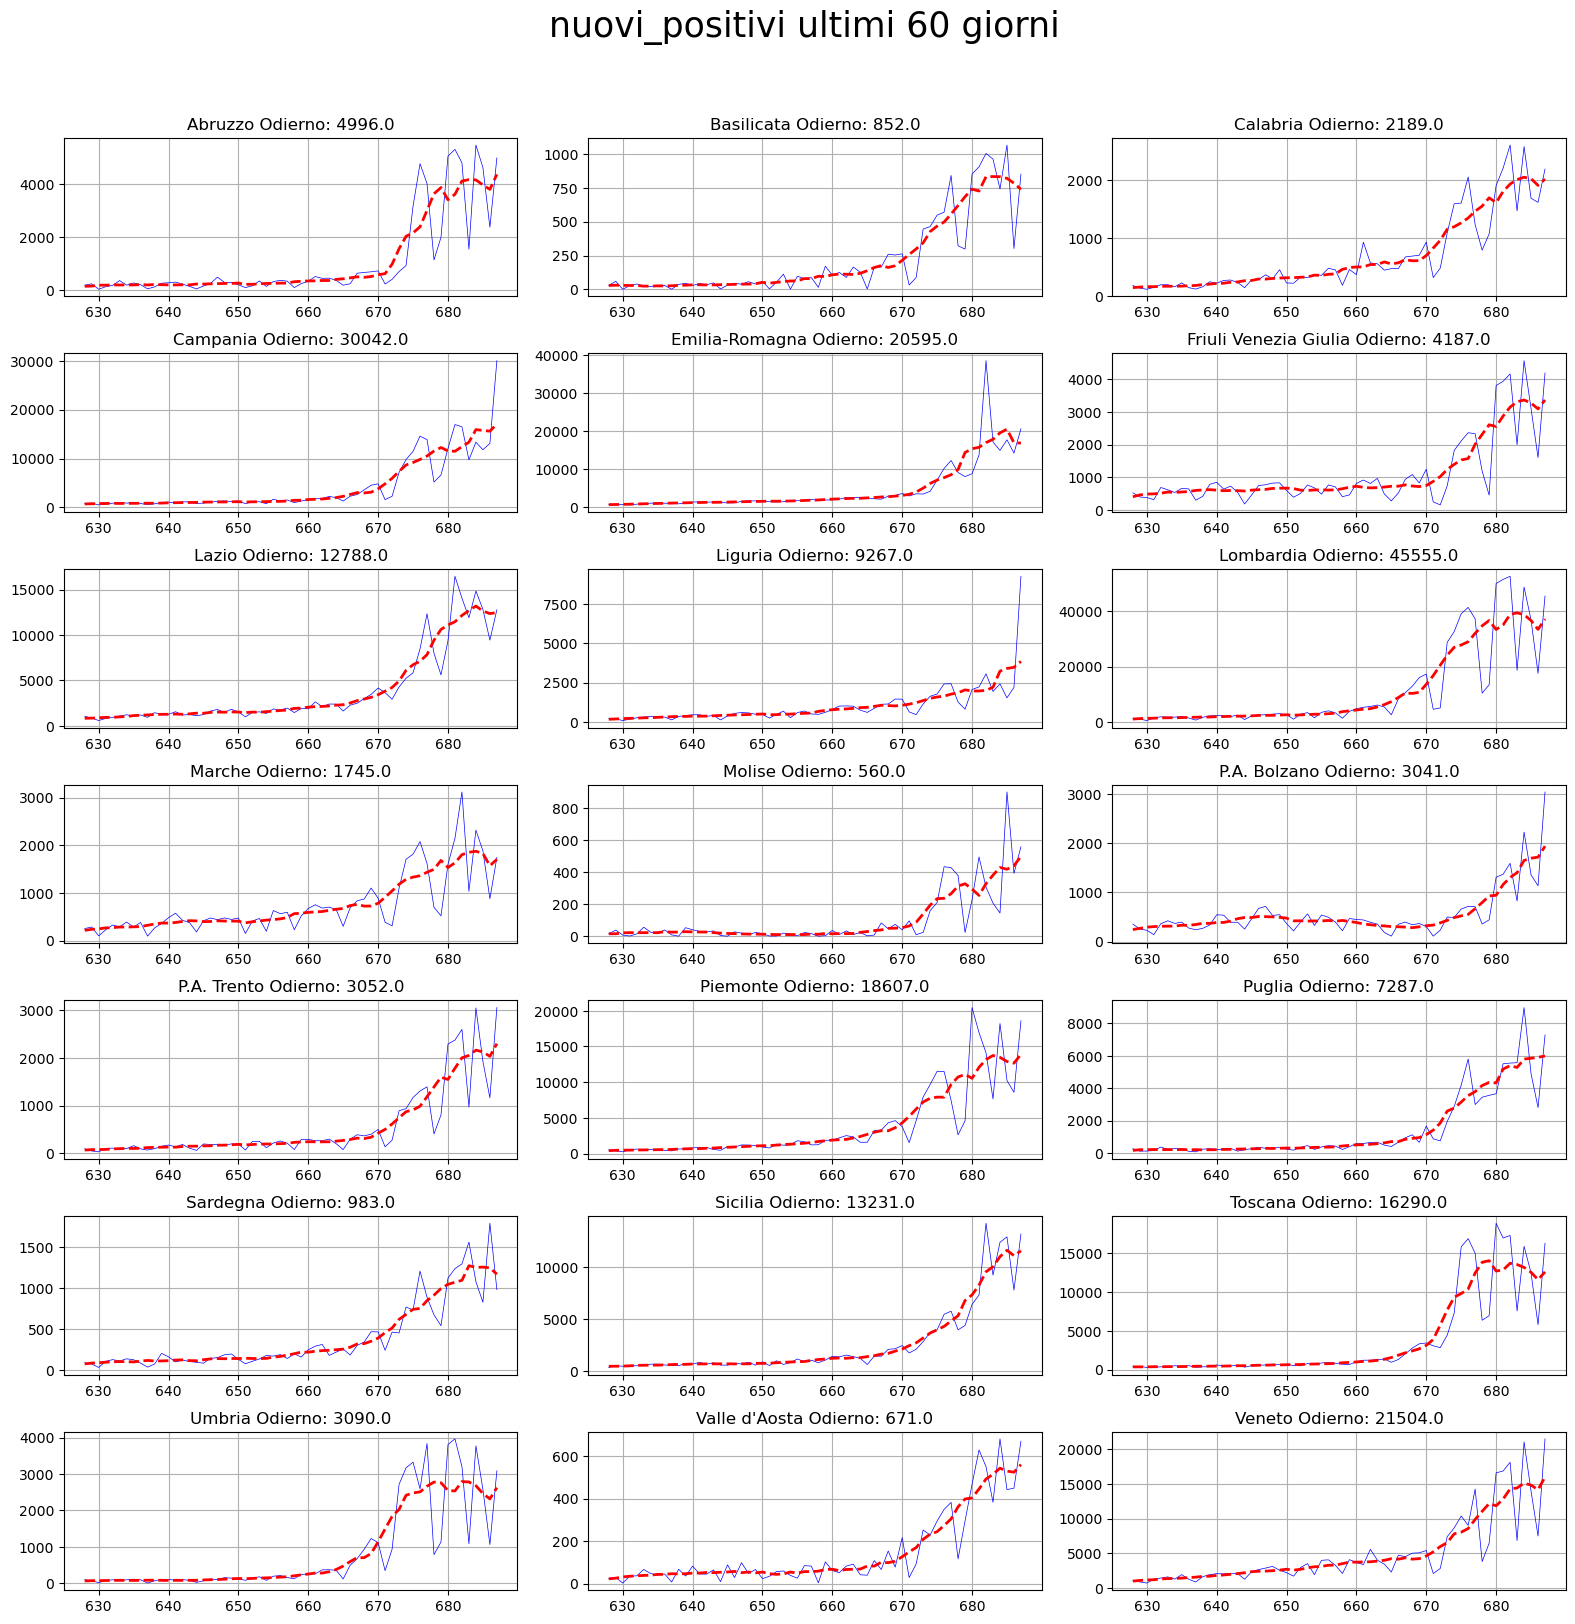

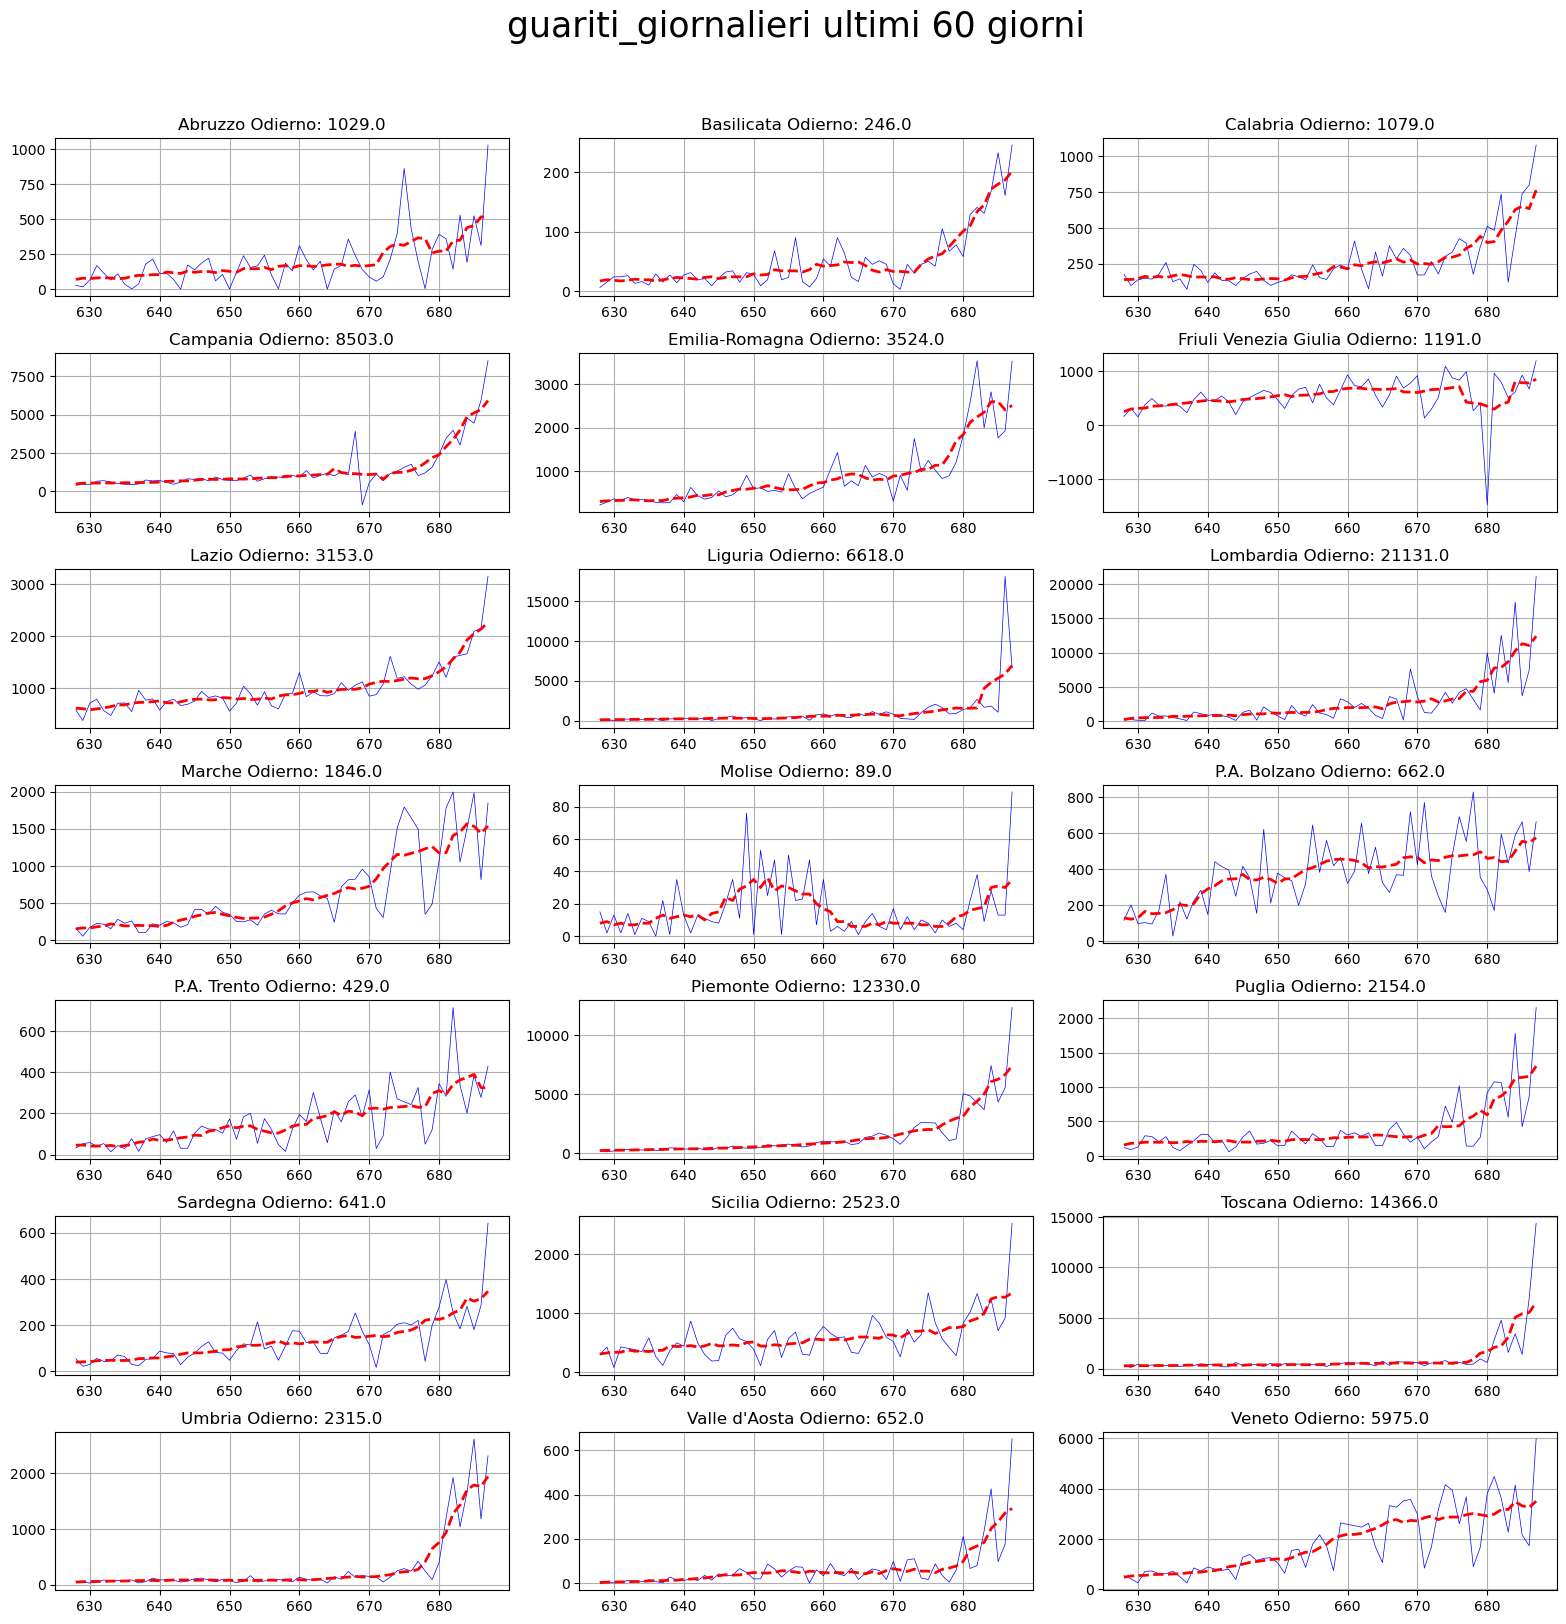

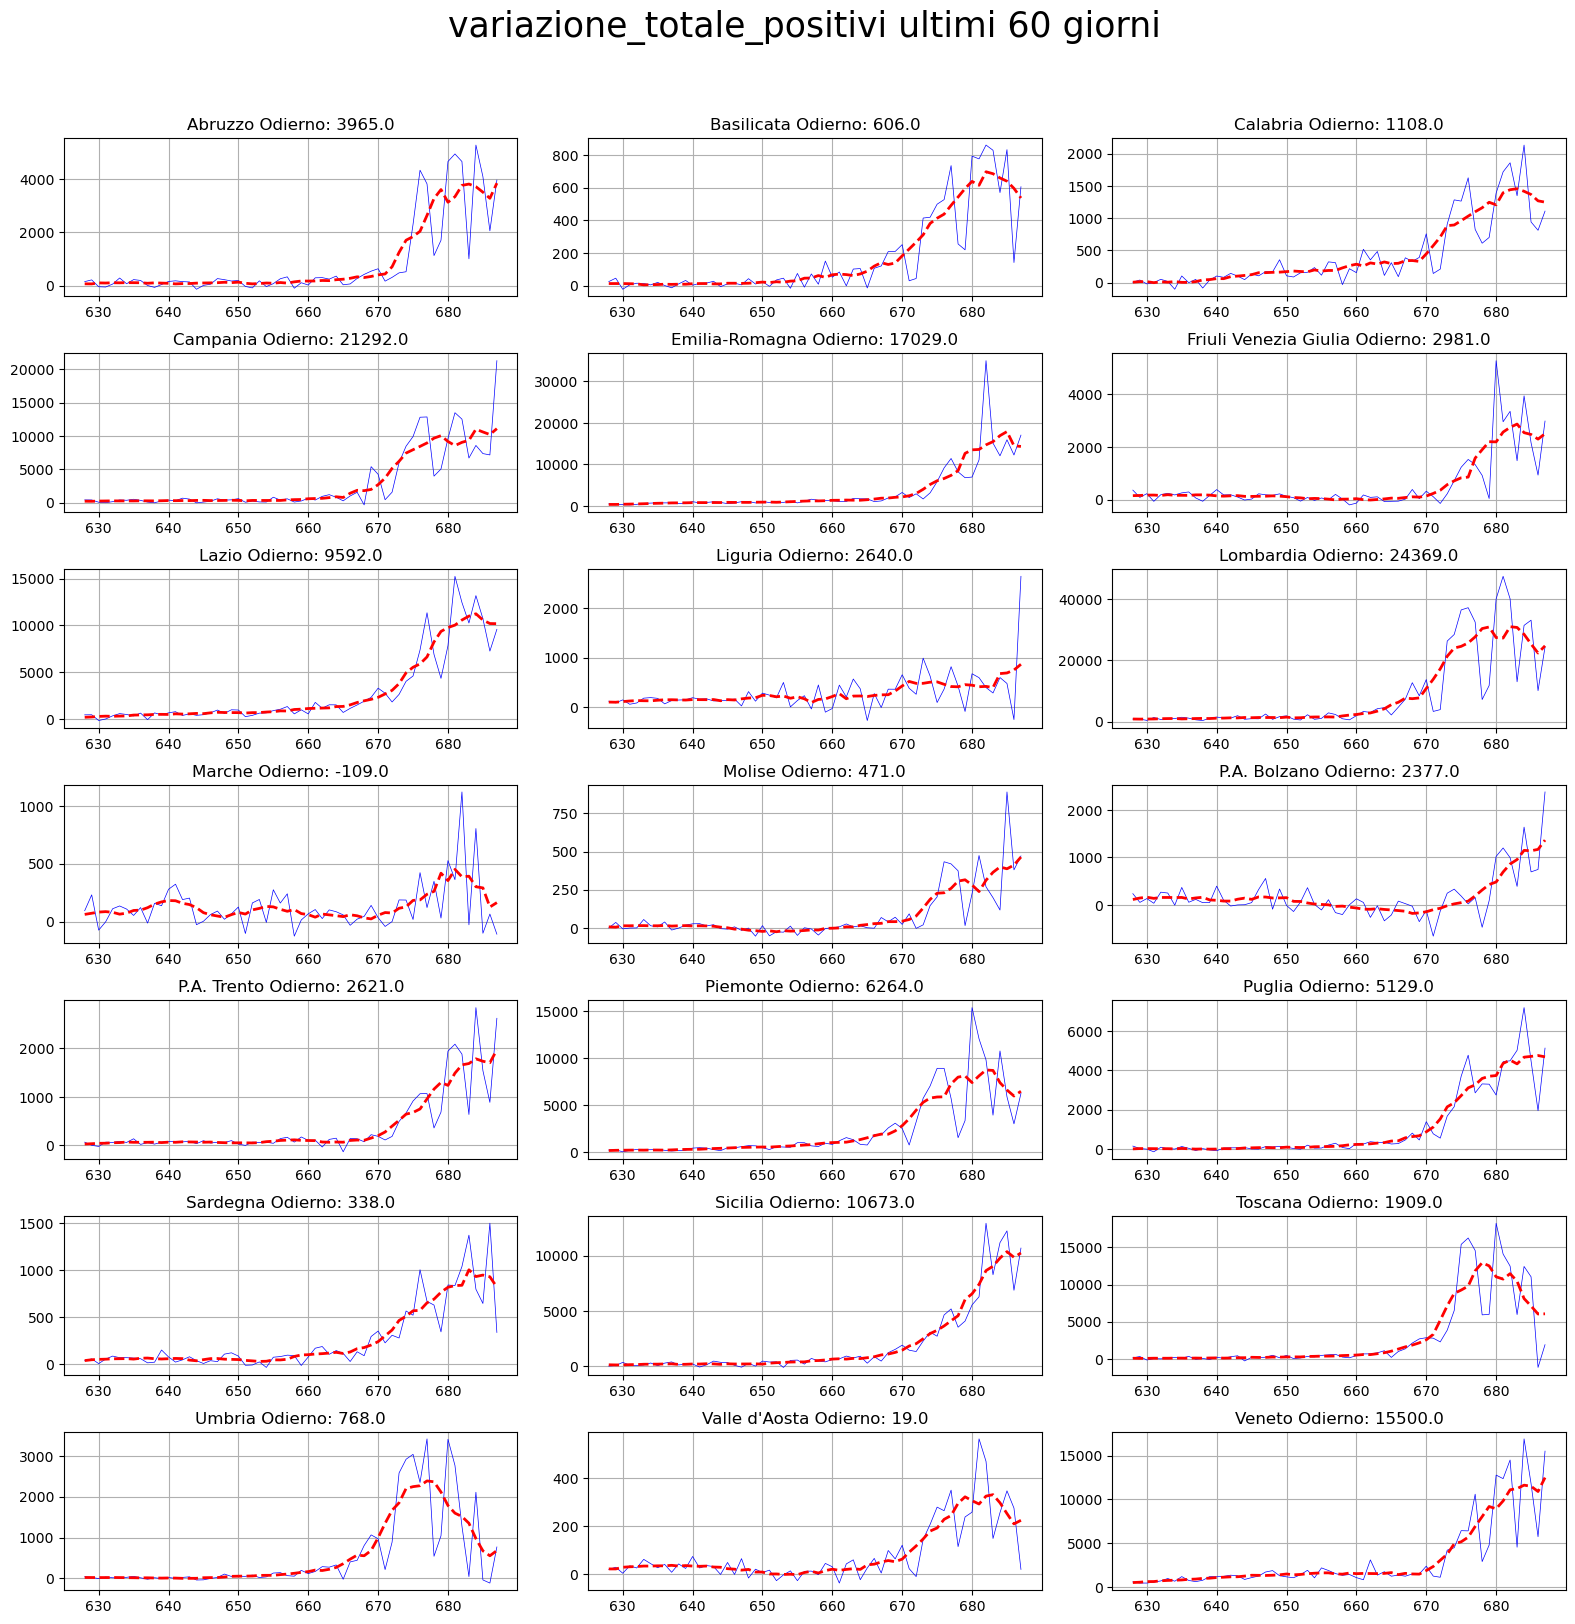

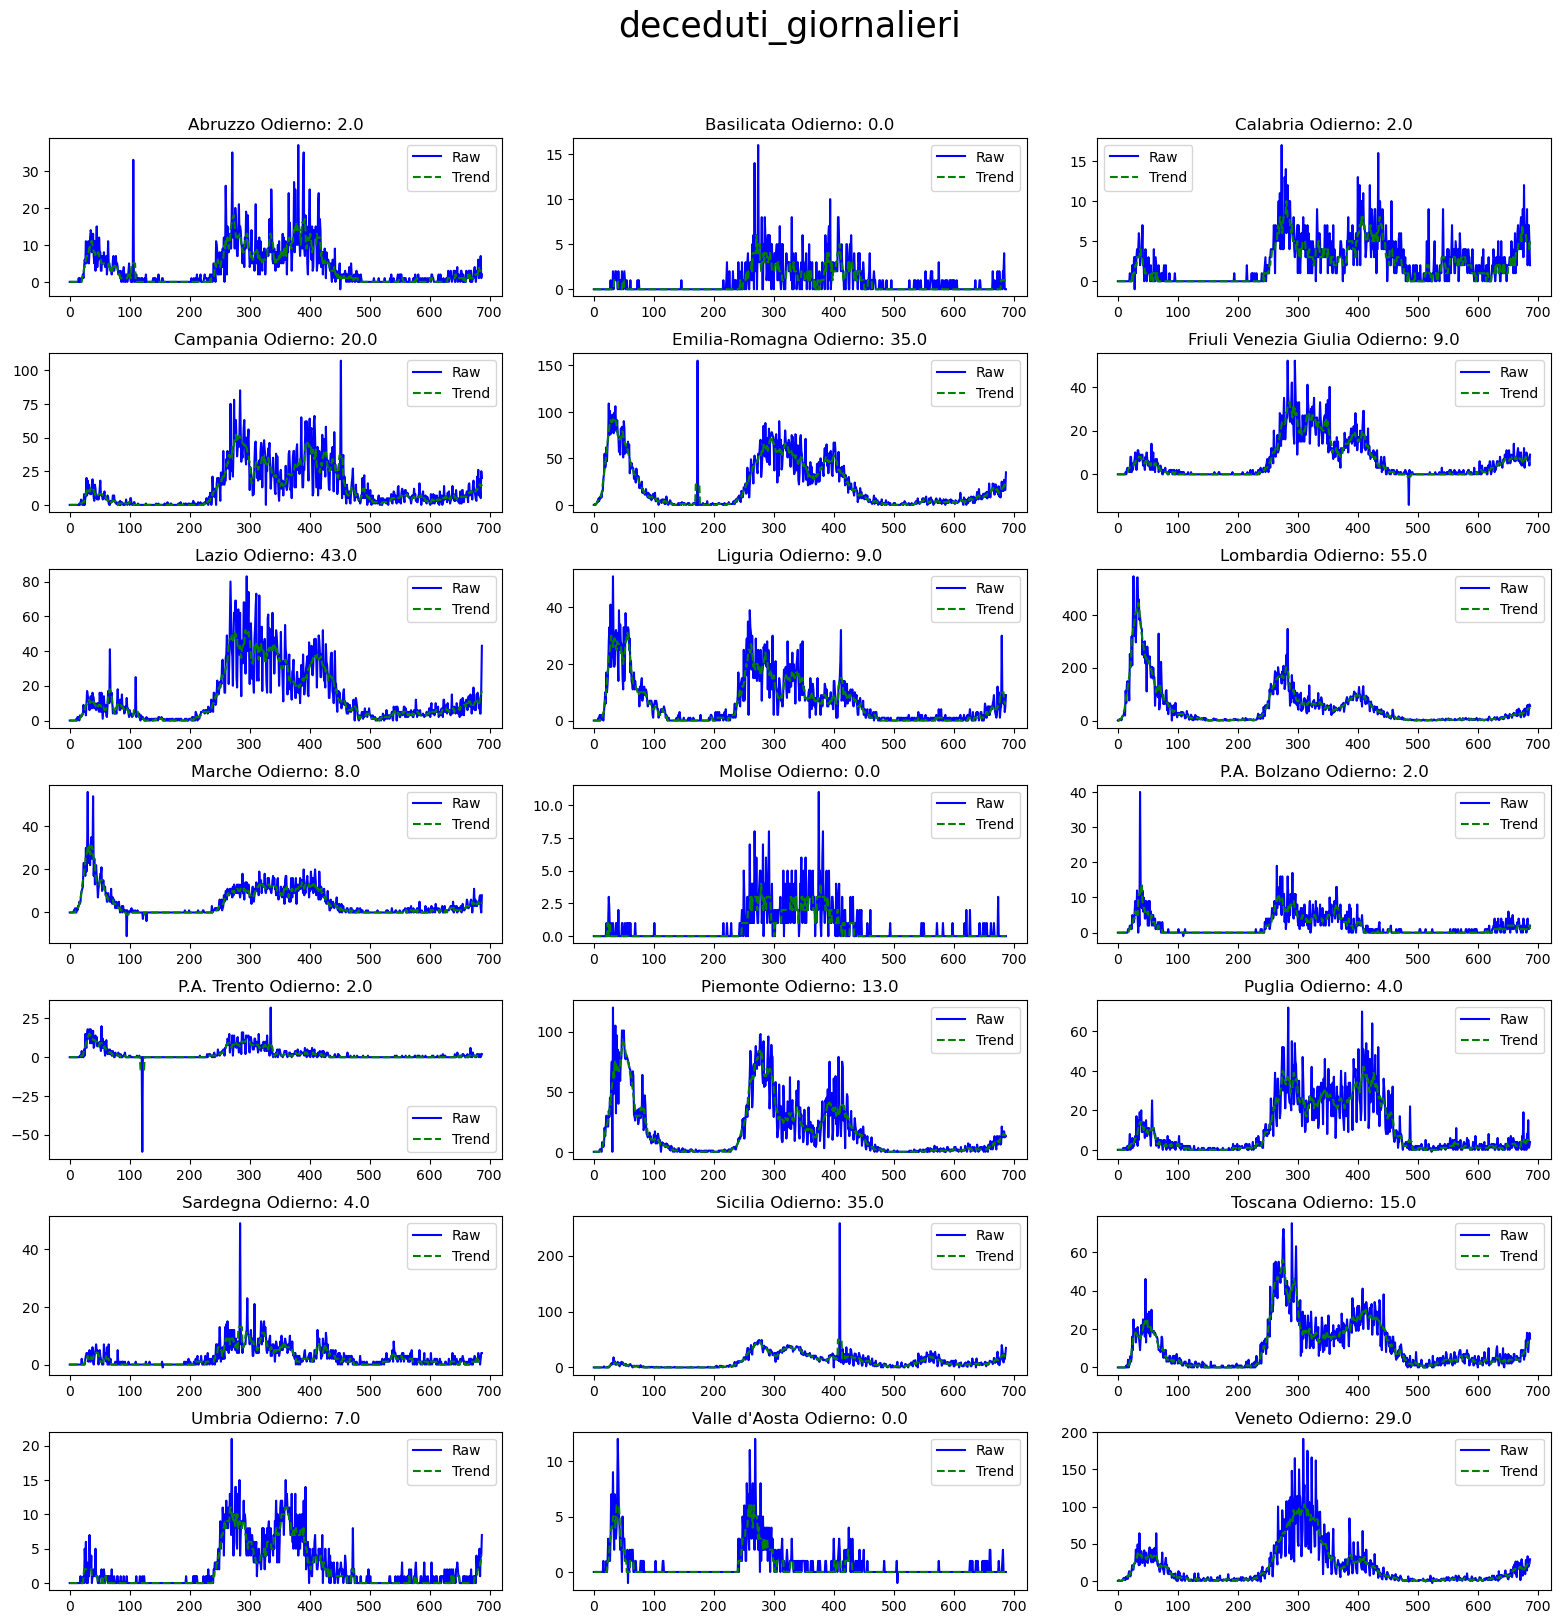

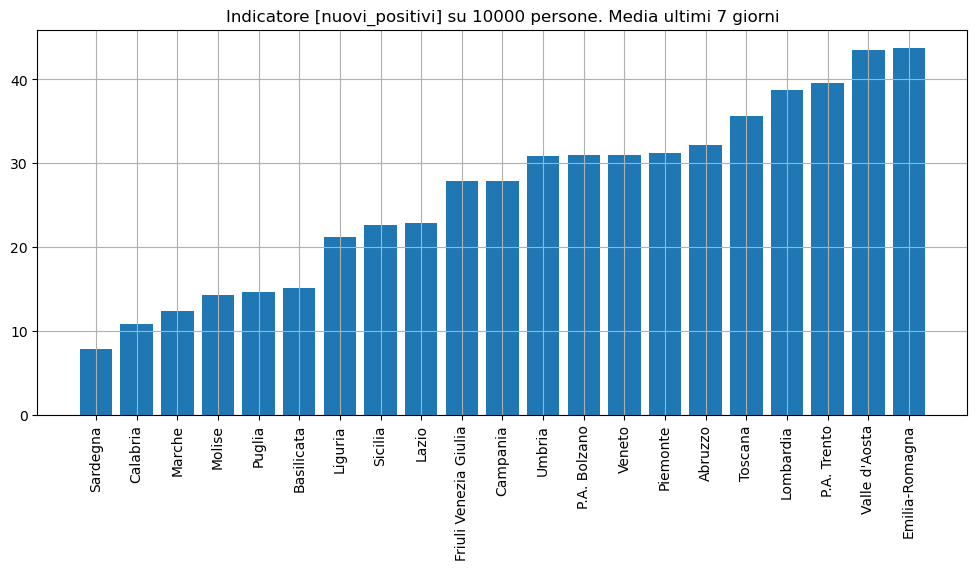

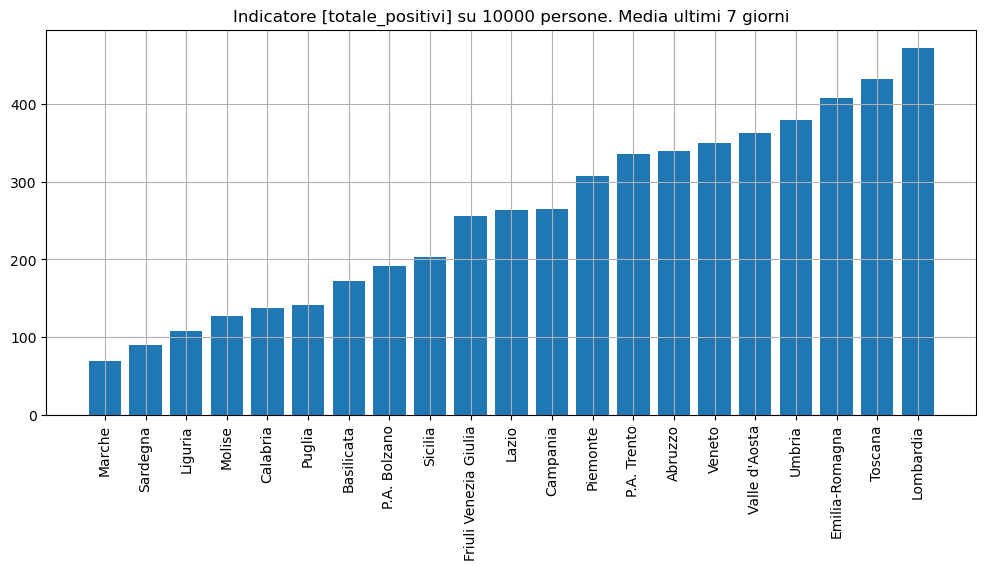

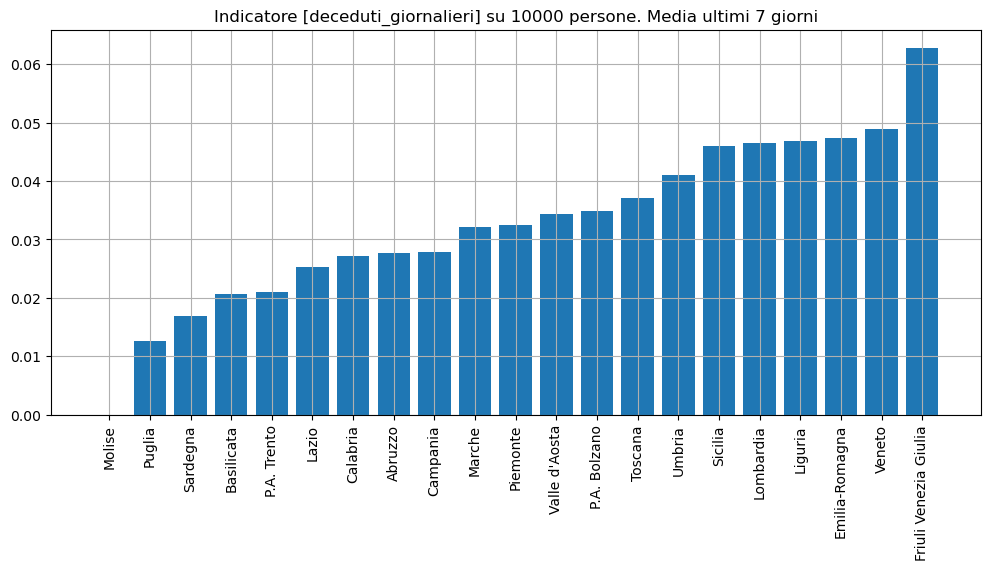

In [33]:
indicatori_selected=['nuovi_positivi','totale_positivi','deceduti_giornalieri']

ultimi_giorni=7
for indicatore in indicatori_selected:
    # calcolo la media da mostrare
    valori=[np.mean(trend[indicatore][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
    valori=np.array(valori)*10000
    ordine=np.argsort(valori)
    plt.figure(figsize=(12,5))
    plt.title('Indicatore [%s] su 10000 persone. Media ultimi %d giorni'%(indicatore,ultimi_giorni))
    plt.bar(range(len(regioni)),valori[ordine])
    plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
    plt.grid()
    plt.show()

### Situazione regione singola

In [34]:
# Selezione regione e indicatori da plottare

regione='Toscana'

indicatori_selected=['nuovi_positivi',
                     'guariti_giornalieri',
                     'deceduti_giornalieri',
                     'totale_positivi','variazione_totale_positivi']

num_indicatori=len(indicatori_selected)

last_days_region=60

In [35]:
from plotly.subplots import make_subplots

regione='Toscana'

fig = make_subplots(rows=len(indicatori_selected), cols=1,
                    vertical_spacing=0.06,
                   subplot_titles=indicatori_selected)

for i,indicatore in enumerate(indicatori_selected):
    fig.add_trace(go.Scatter(x=giorni,
                             y=trend[indicatore][regione],
                             mode='markers',line_color='rgb(31, 119, 180)'),
                 row=i+1,col=1)
    # versione lisciata
    fig.add_trace(go.Scatter(x=giorni,
                             y=moving_function_rev1(trend[indicatore][regione],np.mean,3,3),
                             line_color='rgb(255, 127, 14)'),
                 row=i+1,col=1)

fig.update_layout(
    title=regione,
    autosize=True,
    showlegend=False,
    width=1000,
    height=2000)
fig.update_xaxes(matches='x')

fig.show()

### Relazione fra deceduti e terapia intensiva

In [36]:
from sklearn.linear_model import LinearRegression

var_indip='terapia_intensiva'

lr=LinearRegression()
lr.fit(trend[var_indip]['Italia'].reshape(-1, 1),
         trend['deceduti_giornalieri']['Italia'])

newx=np.linspace(0,max(trend[var_indip]['Italia'])).reshape(-1,1)

lry=lr.predict(newx)

In [37]:
plt.figure(figsize=figsize_single)
plt.plot(trend[var_indip]['Italia'],
         trend['deceduti_giornalieri']['Italia'],
        'bo',label='Data',)

plt.plot(newx,
         lry,
        'g--',label='Fit',)

plt.plot(trend[var_indip]['Italia'][-1],
         trend['deceduti_giornalieri']['Italia'][-1],
        'rd',label=giorni[-1],)


plt.title('Deceduti vs %s'%var_indip)
plt.xlabel(var_indip)
plt.ylabel('Decessi')
plt.legend()
plt.grid()

## Analisi per giorno della settimana

In [38]:
diz_day={0:'DO',
        1:'LU',
        2:'MA',
        3:'ME',
        4:'GI',
        5:'VE',
        6:'SA'}

In [39]:
indicatore='deceduti_giornalieri'
operando=np.mean

last_days=42
counter=np.zeros((7))

temp_vals=trend[indicatore]['Italia'][-last_days:]

In [40]:
for d in range(7):
    indici_day=find_matlabstyle(giorno_settimana[-last_days:],lambda x:x==d)
    counter[d]=operando(temp_vals[indici_day])

In [41]:
fig=go.Figure()
fig.add_trace(go.Bar(y=counter,x=list(diz_day.values())))
    
fig.update_layout(
    title='Indicatore [%s] su giorni settimanali, ultimi %d giorni'%(indicatore,last_days),
    autosize=False,
    showlegend=False,
    width=1000,
    height=500)
fig.show()

## Scatter plots comparativi

In [42]:
x_indicator='nuovi_positivi'
y_indicator='deceduti_giornalieri'

ultimi_giorni=7

moltiplicatore_x=10000
moltiplicatore_y=100000


x_valori=[moltiplicatore_x*np.nanmean(trend[x_indicator][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
y_valori=[moltiplicatore_y*np.nanmean(trend[y_indicator][r][-ultimi_giorni:])/popolazione[r] for r in regioni]

In [43]:
fig=go.Figure()
    
fig.add_trace(go.Scatter(x=x_valori,
                         y=y_valori,
                         text=regioni,
                         textposition="top right",
                         mode='markers+text'))


#fig.update_yaxes(type="log")
#fig.update_xaxes(type="log")

fig.update_layout(
    title='Media ultimi 7 giorni',
    autosize=False,
    showlegend=False,
    xaxis_title='%s per %d abitanti'%(x_indicator,moltiplicatore_x),
    yaxis_title='%s per %d abitanti'%(y_indicator,moltiplicatore_y),
    width=1000,
    height=600)
fig.show()

## Incidenza settimanale per zona rossa

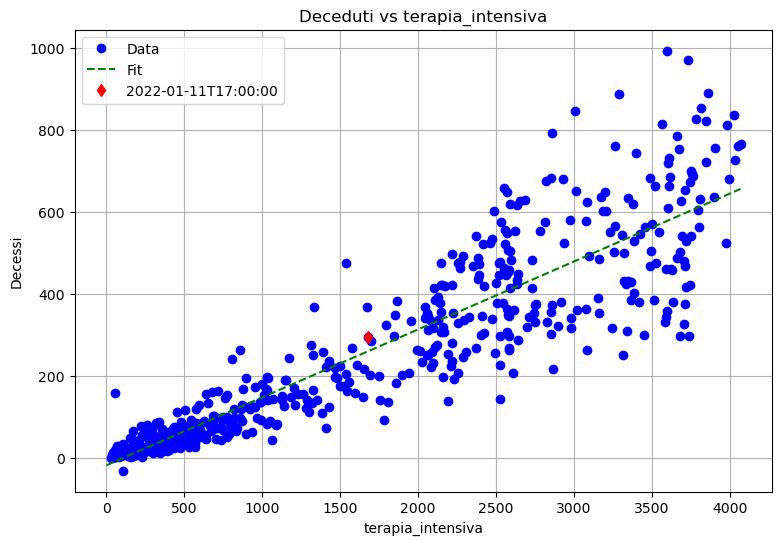

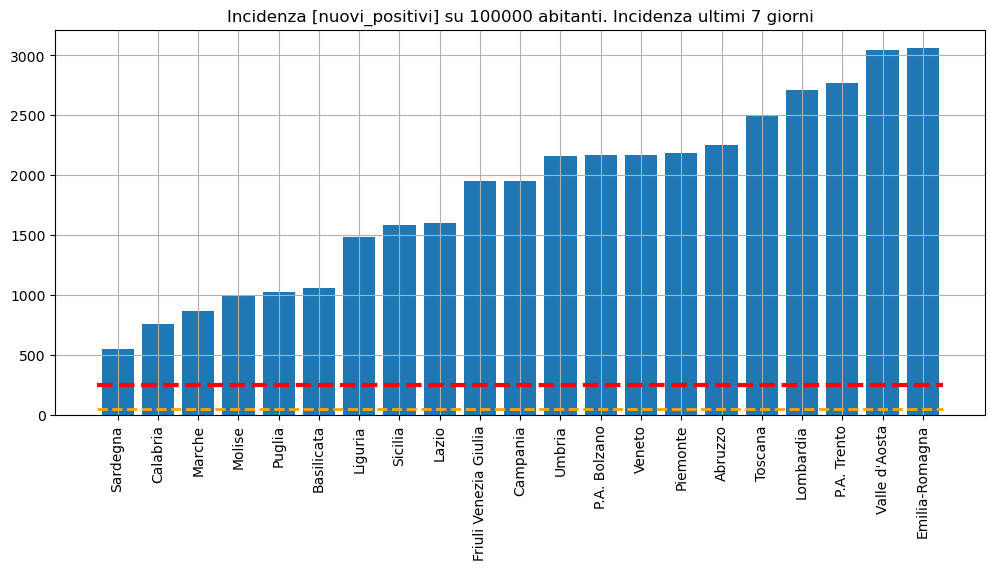

Regione: Sardegna   Incidenza: 544.9 su 100000
Regione: Calabria   Incidenza: 757.2 su 100000
Regione: Marche   Incidenza: 867.7 su 100000
Regione: Molise   Incidenza: 1001.9 su 100000
Regione: Puglia   Incidenza: 1027.9 su 100000
Regione: Basilicata   Incidenza: 1055.0 su 100000
Regione: Liguria   Incidenza: 1486.7 su 100000
Regione: Sicilia   Incidenza: 1584.6 su 100000
Regione: Lazio   Incidenza: 1604.1 su 100000
Regione: Friuli Venezia Giulia   Incidenza: 1951.2 su 100000
Regione: Campania   Incidenza: 1952.9 su 100000
Regione: Umbria   Incidenza: 2156.6 su 100000
Regione: P.A. Bolzano   Incidenza: 2168.4 su 100000
Regione: Veneto   Incidenza: 2169.9 su 100000
Regione: Piemonte   Incidenza: 2188.0 su 100000
Regione: Abruzzo   Incidenza: 2252.0 su 100000
Regione: Toscana   Incidenza: 2497.9 su 100000
Regione: Lombardia   Incidenza: 2710.0 su 100000
Regione: P.A. Trento   Incidenza: 2773.6 su 100000
Regione: Valle d'Aosta   Incidenza: 3047.2 su 100000
Regione: Emilia-Romagna   Incide

In [44]:
indicatori_selected=['nuovi_positivi']

ultimi_giorni=7
for indicatore in indicatori_selected:
    # calcolo la media da mostrare
    valori=[np.sum(trend[indicatore][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
    valori=np.array(valori)*100000
    ordine=np.argsort(valori)
    plt.figure(figsize=(12,5))
    plt.title('Incidenza [%s] su 100000 abitanti. Incidenza ultimi %d giorni'%(indicatore,ultimi_giorni))
    plt.hlines(250,-0.5,20.5,color='r',linestyle='--',linewidth=3)
    plt.hlines(50,-0.5,20.5,color='orange',linestyle='--',linewidth=2)
    plt.bar(range(len(regioni)),valori[ordine])
    plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
    plt.grid()
    plt.show()
    
for pos in ordine:
    print('Regione: %s   Incidenza: %.1f su 100000'%(regioni[pos],valori[pos]))

## Indice dei 250 su 100k nel tempo

In [45]:
popolazione['Italia']=np.sum([popolazione[r] for r in regioni if r!='Italia'])

In [46]:
regione='Toscana'
last_days=60
num_samples=len(trend['nuovi_positivi'][regione])

valori_italia=[np.sum(trend['nuovi_positivi']['Italia'][d-7:d])/popolazione['Italia']*100000 for d in range(num_samples-last_days+1,num_samples+1)]
valori_italia=np.array(valori_italia)

valori=[np.sum(trend['nuovi_positivi'][regione][d-7:d])/popolazione[regione]*100000 for d in range(num_samples-last_days+1,num_samples+1)]
valori=np.array(valori)

fig,ax=plt.subplots(1,figsize=(16,7))
# regione
ax.plot(list(range(last_days)),valori,'o--',color='orange',linewidth=0.5,label='Raw %s'%regione)
ax.plot(list(range(last_days)),moving_function_rev1(valori,np.mean,3,3),linewidth=2,color='orange',label='Trend %s'%regione)
# Italia
ax.plot(list(range(last_days)),valori_italia,'bo--',linewidth=0.5,label='Raw Italia')
ax.plot(list(range(last_days)),moving_function_rev1(valori_italia,np.mean,3,3),linewidth=2,color='blue',label='Trend Italia')

ax.legend()
ax.set_title('Italia, %s - Nuovi infetti ogni 100k abitanti'%regione)
ax.set_xticks(list(range(0,last_days,5)))
ax.set_xticklabels(giorni_label[list(range(len(giorni)-last_days,len(giorni),5))])
ax.grid()

Estendo il calcolo a tutte le regioni per un grafico più completo

In [47]:
last_days=365
num_samples=len(trend['nuovi_positivi'][regione])

nuovi_pos_100k={}
for regione in regioni:
    nuovi_pos_100k[regione]=[np.sum(trend['nuovi_positivi'][regione][d-7:d])/popolazione[regione]*100000 for d in range(num_samples-last_days+1,num_samples+1)]
    nuovi_pos_100k[regione]=np.array(nuovi_pos_100k[regione])
    
# adesso l'Italia
nuovi_pos_100k['Italia']=[np.sum(trend['nuovi_positivi']['Italia'][d-7:d])/popolazione['Italia']*100000 for d in range(num_samples-last_days+1,num_samples+1)]
nuovi_pos_100k['Italia']=np.array(nuovi_pos_100k['Italia'])


In [48]:


days_label=[g[0:10] for g in giorni[-last_days:]]
fig = go.Figure()
for regione in regioni:
    fig.add_trace(go.Scatter(y=nuovi_pos_100k[regione],
                             x=days_label,
                             name=regione))

    
fig.update_layout(
    title="Nuovi positivi su 100k abitanti",
    legend_title="Regione",
    autosize=False,
    width=1200,
    height=600
)
fig.show()